# Weather Forecasting Using Machine Learning Techniques 

## Introduction

### Purpose

Weather has a profound effect on human health and well-being. The climate is changing at a drastic rate nowadays.As predictions affect a nation’s economy and the lives of people,a good and reliable weather prediction method is required. To find an improved weather forecasting system that can be used in remote areas is the main purpose of this project. Different model has been used and then compared to see the results so that the model with the highest accuracy can be detected and most prefered.

### Solution Design

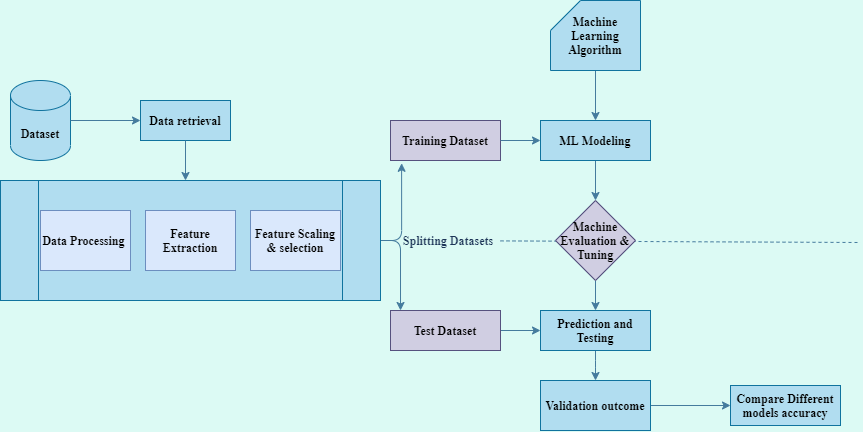

## About The Dataset


### Data Source

The dataset consists of historical weather parameters (temperature, pressure, relative humidity) for major North American and other cities around the world over an extended time period of 2012 to 2017. Hourly data points are recorded, giving, over 45000 data points, in total.

By attepmpting to do a time-series prediction, we are implicitly assuming that the past weather pattern is a good indicator of the future.For this analysis, we focus only on the data for a particular city that we want to choose.

The full dataset (Historical Hourly Weather Data 2012-2017) can be found here: https://www.kaggle.com/selfishgene/historical-hourly-weather-data

### Details of Dataset

The collection of data comprises 5 years of high temporal resolution (hourly readings) data on a variety of meteorological variables, including temperature, humidity, air pressure, and so on. This information is accessible for 30 cities in the United States and Canada, as well as six cities in Israel.

Features

### Necessary Libraries

In [100]:
# Container Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Label Encoding Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# Machine Learning Libraries
from sklearn.model_selection import train_test_split # for splitting dataset
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.naive_bayes import GaussianNB # for Nayev Bayes Algorithm
from sklearn.ensemble import RandomForestClassifier # for Random Forest Model

#SMOTING Library
from imblearn.over_sampling import SMOTE

# To plot the graph embedded in the notebook
%matplotlib inline

### Loading Raw Dataset

In [101]:
humidity = pd.read_csv('Dataset/humidity.csv')
pressure = pd.read_csv('Dataset/pressure.csv')
temperature = pd.read_csv('Dataset/temperature.csv')
wind_speed = pd.read_csv('Dataset/wind_speed.csv')
wind_direction = pd.read_csv('Dataset/wind_direction.csv')
weather_description = pd.read_csv('Dataset/weather_description.csv')

### Loading City Attributes

In [102]:
cities = pd.read_csv('Dataset/city_attributes.csv')

cities

City        Country   Latitude   Longitude
0           Vancouver         Canada  49.249660 -123.119339
1            Portland  United States  45.523449 -122.676208
2       San Francisco  United States  37.774929 -122.419418
3             Seattle  United States  47.606209 -122.332069
4         Los Angeles  United States  34.052231 -118.243683
5           San Diego  United States  32.715328 -117.157257
6           Las Vegas  United States  36.174969 -115.137222
7             Phoenix  United States  33.448380 -112.074043
8         Albuquerque  United States  35.084492 -106.651138
9              Denver  United States  39.739151 -104.984703
10        San Antonio  United States  29.424120  -98.493629
11             Dallas  United States  32.783058  -96.806671
12            Houston  United States  29.763281  -95.363274
13        Kansas City  United States  39.099731  -94.578568
14        Minneapolis  United States  44.979969  -93.263840
15        Saint Louis  United States  38.627270  -90.197891
16            Chicago  United States  41.850029  -87.650047
17          Nashville  United States  36.165890  -86.784439
18       Indianapolis  United States  39.768379  -86.158043
19            Atlanta  United States  33.749001  -84.387978
20            Detroit  United States  42.331429  -83.045753
21       Jacksonville  United States  30.332180  -81.655647
22          Charlotte  United States  35.227089  -80.843132
23              Miami  United States  25.774269  -80.193657
24         Pittsburgh  United States  40.440620  -79.995888
25            Toronto         Canada  43.700111  -79.416298
26       Philadelphia  United States  39.952339  -75.163788
27           New York  United States  40.714272  -74.005966
28           Montreal         Canada  45.508839  -73.587807
29             Boston  United States  42.358429  -71.059769
30          Beersheba         Israel  31.251810   34.791302
31  Tel Aviv District         Israel  32.083328   34.799999
32              Eilat         Israel  29.558050   34.948212
33              Haifa         Israel  32.815559   34.989170
34          Nahariyya         Israel  33.005859   35.094090
35          Jerusalem         Israel  31.769039   35.216331

### Selecting City For Forecasting Data 

In [103]:
# Setting City Name For Selecting Data 
City = 'Boston'

# Selection Of Data Based On City
df_humidity = humidity[['datetime', City]]
df_pressure = pressure[City]
df_temperature = temperature[City]
df_wind_speed = wind_speed[City]
df_wind_direction = wind_direction[City]
df_weather_description = weather_description[City]

### Renaming & Creating a New Dataframe

In [104]:
# Merging Into A Complete Dataframe
df = df_humidity.rename(columns = {City:'humidity'})
df['pressure'] = df_pressure
df['temperature'] = df_temperature
df['wind_speed'] = df_wind_speed
df['wind_direction'] = df_wind_direction
df['weather_description'] = df_weather_description

# Saving Dataframe As A CSV
df.to_csv('Cities/'+ City + '.csv', index=False)

### Loading Target Dataset

In [105]:
# Setting Target City Name For Dataset
City = 'Boston'

# Loading CSV File In A Dataframe
frame = pd.read_csv('Cities/'+ City +'.csv')

frame

datetime  humidity  pressure  temperature  wind_speed  \
0      2012-10-01 12:00:00       NaN       NaN          NaN         NaN   
1      2012-10-01 13:00:00      68.0    1014.0   287.170000         3.0   
2      2012-10-01 14:00:00      68.0    1014.0   287.186092         3.0   
3      2012-10-01 15:00:00      68.0    1014.0   287.231672         3.0   
4      2012-10-01 16:00:00      68.0    1014.0   287.277251         3.0   
...                    ...       ...       ...          ...         ...   
45248  2017-11-29 20:00:00      37.0    1017.0   288.080000         8.0   
45249  2017-11-29 21:00:00      74.0    1019.0   286.020000         6.0   
45250  2017-11-29 22:00:00      74.0    1019.0   283.940000         7.0   
45251  2017-11-29 23:00:00      56.0    1022.0   282.170000         2.0   
45252  2017-11-30 00:00:00      56.0    1023.0   280.650000         2.0   

       wind_direction weather_description  
0                 NaN                 NaN  
1                60.0        sky is clear  
2                60.0          few clouds  
3                60.0          few clouds  
4                60.0          few clouds  
...               ...                 ...  
45248           290.0       broken clouds  
45249           340.0       broken clouds  
45250           340.0       broken clouds  
45251           330.0          few clouds  
45252           320.0       broken clouds  

[45253 rows x 7 columns]

### Cleaning Dataset

In [106]:
# Filling Rows With Null Values
frame['humidity']=frame['humidity'].fillna(method='bfill')
frame['temperature']=frame['temperature'].fillna(method='bfill')
frame['pressure']=frame['pressure'].fillna(method='bfill')
frame['wind_speed']=frame['wind_speed'].fillna(method='bfill')
frame['wind_direction']=frame['wind_direction'].fillna(method='bfill')
frame['weather_description']=frame['weather_description'].fillna(method='bfill')

frame['humidity']=frame['humidity'].fillna(method='ffill')
frame['temperature']=frame['temperature'].fillna(method='ffill')
frame['pressure']=frame['pressure'].fillna(method='ffill')
frame['wind_speed']=frame['wind_speed'].fillna(method='ffill')
frame['wind_direction']=frame['wind_direction'].fillna(method='ffill')
frame['weather_description']=frame['weather_description'].fillna(method='ffill')

# Adjusting Wind Speed & Direction
for i in frame.index:
    if frame['wind_speed'][i] == 0 and not frame['wind_direction'][i] == 0:
        frame.loc[frame.index == i, 'wind_speed'] = frame['wind_speed'].median()
    if not frame['wind_speed'][i] == 0 and frame['wind_direction'][i] == 0:
        frame.loc[frame.index == i, 'wind_direction'] = frame['wind_direction'].median()

In [107]:
# Splitting Date-Time
time=pd.DatetimeIndex(frame['datetime'])
frame['day']=time.day
frame['month']=time.month
frame['year']=time.year
del frame['datetime']

frame

humidity  pressure  temperature  wind_speed  wind_direction  \
0          68.0    1014.0   287.170000         3.0            60.0   
1          68.0    1014.0   287.170000         3.0            60.0   
2          68.0    1014.0   287.186092         3.0            60.0   
3          68.0    1014.0   287.231672         3.0            60.0   
4          68.0    1014.0   287.277251         3.0            60.0   
...         ...       ...          ...         ...             ...   
45248      37.0    1017.0   288.080000         8.0           290.0   
45249      74.0    1019.0   286.020000         6.0           340.0   
45250      74.0    1019.0   283.940000         7.0           340.0   
45251      56.0    1022.0   282.170000         2.0           330.0   
45252      56.0    1023.0   280.650000         2.0           320.0   

      weather_description  day  month  year  
0            sky is clear    1     10  2012  
1            sky is clear    1     10  2012  
2              few clouds    1     10  2012  
3              few clouds    1     10  2012  
4              few clouds    1     10  2012  
...                   ...  ...    ...   ...  
45248       broken clouds   29     11  2017  
45249       broken clouds   29     11  2017  
45250       broken clouds   29     11  2017  
45251          few clouds   29     11  2017  
45252       broken clouds   30     11  2017  

[45253 rows x 9 columns]

### Analysing Data

In [108]:
# Description Of Each Attributes Of The Dataframe
frame.describe()

humidity      pressure   temperature    wind_speed  wind_direction  \
count  45253.000000  45253.000000  45253.000000  45253.000000    45253.000000   
mean      77.297129   1019.861026    283.779303      3.488608      188.741277   
std       18.782166      9.547977      9.802595      2.183797      104.816601   
min       11.000000    978.000000    249.540000      0.000000        0.000000   
25%       64.000000   1014.000000    276.090000      2.000000       90.000000   
50%       81.000000   1019.000000    284.132500      3.000000      210.000000   
75%       93.000000   1026.000000    291.620000      5.000000      272.000000   
max      100.000000   1054.000000    308.000000     20.000000      360.000000   

                day         month          year  
count  45253.000000  45253.000000  45253.000000  
mean      15.725322      6.648730   2014.821051  
std        8.793919      3.464906      1.507743  
min        1.000000      1.000000   2012.000000  
25%        8.000000      4.000000   2014.000000  
50%       16.000000      7.000000   2015.000000  
75%       23.000000     10.000000   2016.000000  
max       31.000000     12.000000   2017.000000

In [109]:
# Number of Samples of Each Target Class of The Dataframe
frame.groupby('weather_description').size()

weather_description
broken clouds                    3313
drizzle                            63
dust                                5
few clouds                       2214
fog                              1331
freezing rain                       1
haze                              234
heavy intensity drizzle             5
heavy intensity rain              425
heavy snow                        133
light intensity drizzle           176
light rain                       4828
light rain and snow                 1
light snow                        565
mist                             4803
moderate rain                    1705
overcast clouds                  4081
proximity thunderstorm             95
scattered clouds                 3459
sky is clear                    17445
snow                              265
squalls                             7
thunderstorm                       31
thunderstorm with heavy rain        6
thunderstorm with light rain       18
thunderstorm with rain        

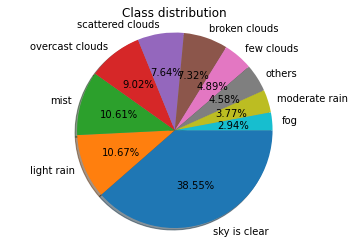

In [110]:
# Processing Data For Pie Chart
class_occur = frame['weather_description'].value_counts()
class_names = ['sky is clear','light rain','mist','overcast clouds','scattered clouds','broken clouds', 'few clouds','others','moderate rain','fog']
change = class_occur.append(pd.Series([class_occur[9]+class_occur[10]+class_occur[11]+class_occur[12]+class_occur[13]+class_occur[14]+class_occur[15]+class_occur[16]+class_occur[17]+class_occur[18]+class_occur[19]+class_occur[20]+class_occur[21]+class_occur[22]+class_occur[23]+class_occur[24]+class_occur[25]+class_occur[26]]))
change = change.rename(index={0: 'others'})
class_occur   = change.drop(['light snow', 'heavy intensity rain', 'snow', 'haze', 'light intensity drizzle', 'heavy snow', 'proximity thunderstorm', 'drizzle', 'very heavy rain', 'thunderstorm', 'thunderstorm with light rain', 'squalls', 'thunderstorm with rain', 'thunderstorm with heavy rain', 'dust', 'heavy intensity drizzle', 'light rain and snow', 'freezing rain']);
class_occur = class_occur.sort_values(ascending=False)

# Creating Pie Chart Of Target Class
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
       shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

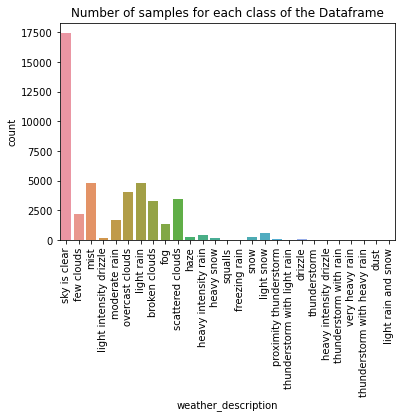

In [111]:
# Visualization of Samples of Each Target Class of The Dataframe
sns.countplot(x='weather_description', data=frame)

plt.xticks(rotation=90)

plt.title("Number of samples for each class of the Dataframe");

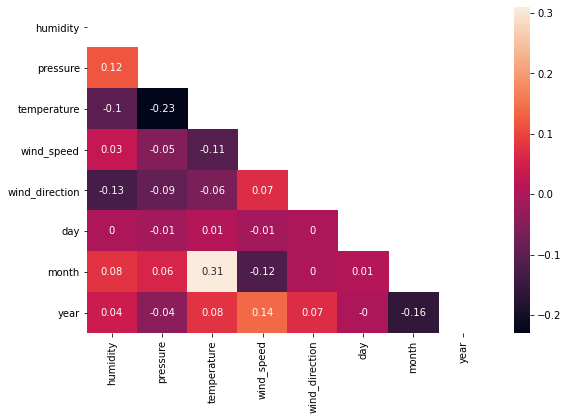

In [112]:
# Visualizing The Correlation Matrix
correlation_matrix = frame.corr().round(2)

mask = np.zeros_like(correlation_matrix)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (9, 6))

sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

plt.show()

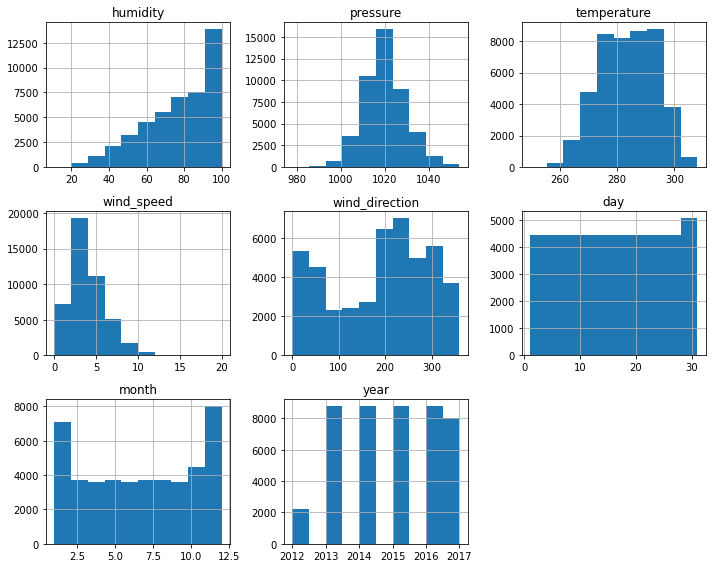

In [113]:
# Showing Histogram Of Data
fig = frame.hist(figsize=(10,8))

plt.tight_layout()

plt.show()

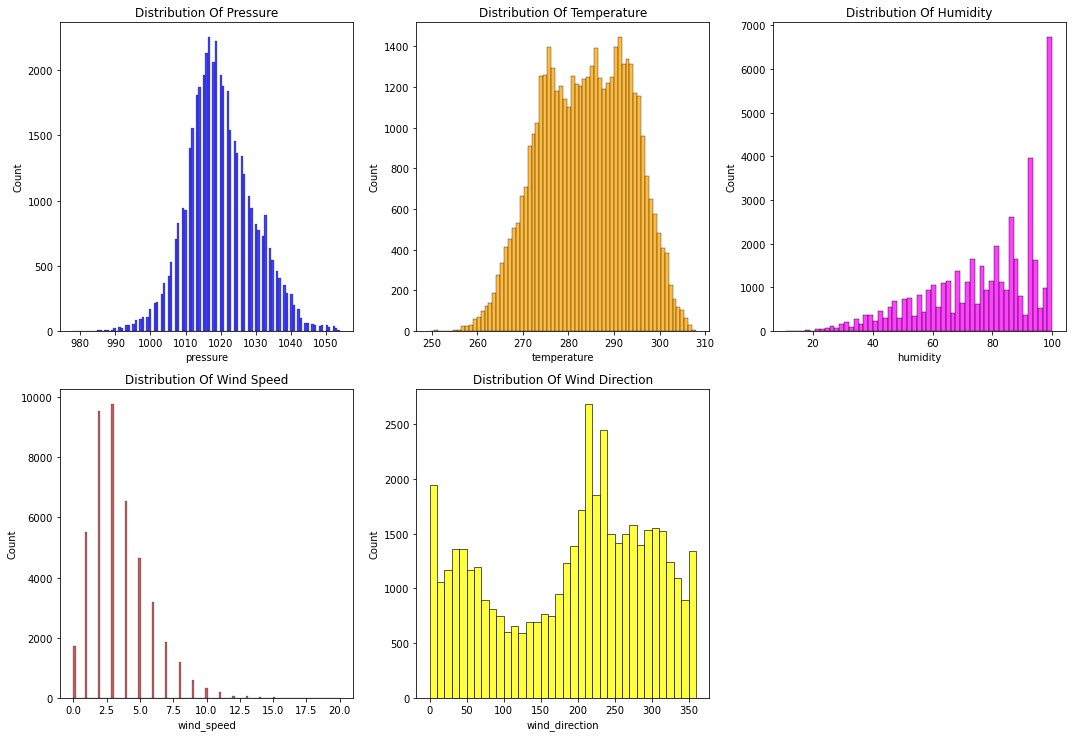

In [114]:
# Visualization to check the distribution of the attributes:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.histplot(frame['pressure'],color='blue')
plt.title('Distribution Of Pressure')

plt.subplot(3,3,2)
sns.histplot(frame['temperature'],color='orange')
plt.title('Distribution Of Temperature')

plt.subplot(3,3,3)
sns.histplot(frame['humidity'],color='magenta')
plt.title('Distribution Of Humidity')

plt.subplot(3,3,4)
sns.histplot(frame['wind_speed'],color='brown')
plt.title('Distribution Of Wind Speed')

plt.subplot(3,3,5)
sns.histplot(frame['wind_direction'],color='yellow')
plt.title('Distribution Of Wind Direction')

plt.tight_layout()
plt.show()

### Removing Minimum Samples

In [115]:
frame = frame[frame.weather_description != 'freezing rain']

frame = frame[frame.weather_description != 'light rain and snow']

frame = frame[frame.weather_description != 'dust']

frame = frame[frame.weather_description != 'heavy intensity drizzle']

### Label Encoding 
#### (Not Necessary For Target Variable)

In [116]:
# Creating encoder for categorical value of weather
#label_descr = LabelEncoder()

# Transforming Column Into Encoded labels
#frame['weather_description'] = label_descr.fit_transform(frame['weather_description'])

#target = frame['weather_description'].value_counts()
#targetX = pd.get_dummies(target.index).values.tolist()


#data = pd.DataFrame({'weather_description': target.index, 'weather_description_enc': targetX})

#data.index

#target = OneHotEncoder().fit_transform(frame[['weather_description']]).toarray()
#frame['weather_description']
#target
#targetX = LabelBinarizer().fit_transform(frame['weather_description'])
#data = pd.DataFrame({'weather_description': target.index, 'weather_description_enc': targetX})
#targetY = MultiLabelBinarizer().fit_transform(frame['weather_description'])
#data
#targetX
#for i in frame.index:
#   for j in data.index:
#        if frame['weather_description'][i] == data['weather_description'][j]:
#            frame['weather_description'][i] = data['weather_description_enc'][j]

In [117]:
frame.describe()

humidity      pressure   temperature    wind_speed  wind_direction  \
count  45241.000000  45241.000000  45241.000000  45241.000000    45241.000000   
mean      77.293716   1019.862359    283.778936      3.488583      188.749630   
std       18.782688      9.547952      9.803016      2.183818      104.816784   
min       11.000000    978.000000    249.540000      0.000000        0.000000   
25%       64.000000   1014.000000    276.090000      2.000000       90.000000   
50%       81.000000   1019.000000    284.131000      3.000000      210.000000   
75%       93.000000   1026.000000    291.620000      5.000000      272.000000   
max      100.000000   1054.000000    308.000000     20.000000      360.000000   

                day         month          year  
count  45241.000000  45241.000000  45241.000000  
mean      15.725316      6.648770   2014.820804  
std        8.794590      3.464921      1.507631  
min        1.000000      1.000000   2012.000000  
25%        8.000000      4.000000   2014.000000  
50%       16.000000      7.000000   2015.000000  
75%       23.000000     10.000000   2016.000000  
max       31.000000     12.000000   2017.000000

### Creating Feature Matrix & Target Variable

In [118]:
# Feature matrix
X = frame[['day', 'month', 'year', 'humidity', 'pressure', 'temperature', 'wind_speed', 'wind_direction']]
# X = frame[['humidity','pressure','temperature','wind_speed','wind_direction']]
X

day  month  year  humidity  pressure  temperature  wind_speed  \
0        1     10  2012      68.0    1014.0   287.170000         3.0   
1        1     10  2012      68.0    1014.0   287.170000         3.0   
2        1     10  2012      68.0    1014.0   287.186092         3.0   
3        1     10  2012      68.0    1014.0   287.231672         3.0   
4        1     10  2012      68.0    1014.0   287.277251         3.0   
...    ...    ...   ...       ...       ...          ...         ...   
45248   29     11  2017      37.0    1017.0   288.080000         8.0   
45249   29     11  2017      74.0    1019.0   286.020000         6.0   
45250   29     11  2017      74.0    1019.0   283.940000         7.0   
45251   29     11  2017      56.0    1022.0   282.170000         2.0   
45252   30     11  2017      56.0    1023.0   280.650000         2.0   

       wind_direction  
0                60.0  
1                60.0  
2                60.0  
3                60.0  
4                60.0  
...               ...  
45248           290.0  
45249           340.0  
45250           340.0  
45251           330.0  
45252           320.0  

[45241 rows x 8 columns]

In [119]:
# Target variable
# y = frame['temperature'].astype('int')
y = frame['weather_description']

y

0         sky is clear
1         sky is clear
2           few clouds
3           few clouds
4           few clouds
             ...      
45248    broken clouds
45249    broken clouds
45250    broken clouds
45251       few clouds
45252    broken clouds
Name: weather_description, Length: 45241, dtype: object

## Applying SMOTING strategy

In [120]:
# Creating The Object With The Desired Sampling Strategy.
smote = SMOTE(sampling_strategy='not minority')
# fit the object to our training data
X, y = smote.fit_sample(frame.loc[:,frame.columns!='weather_description'], frame['weather_description'])


print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (383796, 8)
Shape of y: (383796,)


### Splitting The Dataset For Train-Test

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (345416, 8)
X_test shape:  (38380, 8)
y_train shape:  (345416,)
y_test shape:  (38380,)


## Applying Machine Learning Techniques

### Support Vector Machine (SVM)

In [122]:
#model_svm = svm.SVC() #select the algorithm
#model_svm.fit(X_train, y_train) #train the model with the training dataset
#y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
#score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
#print("----------------------------------")
#print('The accuracy of the SVM is: {}'.format(score_svm))
#print("----------------------------------")
# save the accuracy score
#score = set()
#score.add(('SVM', score_svm))

### Decision Tree (DT)

In [123]:
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score = set()
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.8743
---------------------------------


###  K Nearest Neighbours (KNN)

In [124]:
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.935
----------------------------------


###  Logistic Regression (LR)

In [125]:
# importing the necessary package to use the classification algorithm
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
#model_lr = LogisticRegression()
#model_lr.fit(X_train, y_train) #train the model with the training dataset
#y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
#score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
#print("---------------------------------")
#print('The accuracy of the LR is: {}'.format(score_lr))
#print("---------------------------------")
# save the accuracy score
#score.add(('LR', score_lr))

### Naive Bayes (NB)

In [126]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.3347
---------------------------------


### Random Forest Classifier (RFC)

In [127]:
#Create a Gaussian Classifier
model_rfc=RandomForestClassifier()

model_rfc.fit(X_train, y_train) #train the model with the training dataset
y_prediction_rfc=model_rfc.predict(X_test) #pass the testing data to the trained model

score_rfc = metrics.accuracy_score(y_prediction_rfc, y_test).round(4)
print("---------------------------------")
print('The accuracy of the RFC is: {}'.format(score_rfc))
print("---------------------------------")
# save the accuracy score
score.add(('RFC', score_rfc))

---------------------------------
The accuracy of the RFC is: 0.9413
---------------------------------


### Comparing Accuracy Score of Different Models

In [128]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)

The accuracy scores of different Models:
----------------------------------------
('NB', 0.3347)
('KNN', 0.935)
('DT', 0.8743)
('RFC', 0.9413)
